In [1]:
#! pip install zarr
#! pip install s3fs
#! pip install climetlab
#! pip install climetlab_s2s_ai_competition --quiet
# !pip install matplotlib -quiet

In [2]:
import climetlab as cml 

module 'Magics' has no attribute 'strict_mode'


In [3]:
import climetlab_s2s_ai_competition
print(f'Climetlab version : {cml.__version__}')
print(f'Climetlab-s2s-ai-competition plugin version : {climetlab_s2s_ai_competition.__version__}')

Climetlab version : 0.2.3
Climetlab-s2s-ai-competition plugin version : 0.2.3


In [4]:
version = '0.1.6' # version of the data
#version = '0.1.20' # version of the data

In [5]:
param = 't2m'

In [6]:
cmlds = cml.load_dataset("s2s-ai-competition-reference-set",
                         date=["20200102", "20200109", "20200116"],
                         version=version,
                         parameter = param,
                         #hindcast=True,
                         format='netcdf')
ds = cmlds.to_xarray()
#ds

By downloading data from this dataset, you agree to the their terms: Attribution 4.0 International(CC BY 4.0). If you do not agree with such terms, do not download the data. For more information, please visit https://www.ecmwf.int/en/terms-use and https://apps.ecmwf.int/datasets/data/s2s/licence/.


In [7]:
ts = ds.sel(realization=0).sel(latitude=37, longitude=0, method='nearest').drop(['realization','latitude','longitude']) ; ts

<xarray.Dataset>
Dimensions:        (forecast_time: 3, time: 60)
Coordinates:
  * forecast_time  (forecast_time) datetime64[ns] 2020-01-02 ... 2020-01-16
  * time           (time) datetime64[ns] 2020-01-03 2020-01-04 ... 2020-03-02
Data variables:
    t2m            (forecast_time, time) float32 287.5 287.2 ... 286.5 286.6

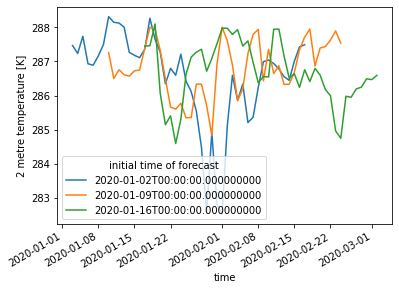

In [10]:
%matplotlib inline
ts[param].plot(hue='forecast_time');

In [14]:
ts.mean('forecast_time')[param]

<xarray.DataArray 't2m' (time: 60)>
array([287.46783, 287.23428, 287.73975, 286.93195, 286.89035, 287.1639 ,
       287.5014 , 287.79114, 287.325  , 287.44333, 287.3083 , 286.91907,
       286.95325, 286.9291 , 287.39975, 287.9127 , 287.89685, 286.8892 ,
       285.99258, 285.95383, 285.59482, 286.09708, 286.12894, 286.1985 ,
       286.38477, 286.0513 , 284.9941 , 285.61008, 285.7471 , 286.16504,
       286.8978 , 287.0949 , 286.5461 , 286.6616 , 286.68076, 286.71094,
       286.8516 , 286.6603 , 286.98218, 287.17664, 287.20227, 286.6805 ,
       286.42947, 286.77582, 287.0038 , 287.3208 , 287.18155, 286.83188,
       286.99722, 286.80908, 286.81024, 286.4295 , 286.14   , 285.9778 ,
       285.94766, 286.19363, 286.246  , 286.49194, 286.46655, 286.59192],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-03 2020-01-04 ... 2020-03-02

In [15]:
ts.mean('time')[param]

<xarray.DataArray 't2m' (forecast_time: 3)>
array([286.55045, 286.82867, 286.67868], dtype=float32)
Coordinates:
  * forecast_time  (forecast_time) datetime64[ns] 2020-01-02 ... 2020-01-16